In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
import warnings
warnings.filterwarnings('ignore')

##### Datasets from data.nashville.gov
##### School Districts in Davidson County

In [3]:
school_districts = gpd.read_file('../data/school_districts.geojson')
print(school_districts.crs)
school_districts.head()

epsg:4326


,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.76590 ..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


In [4]:
type(school_districts)

geopandas.geodataframe.GeoDataFrame

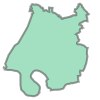

In [5]:
school_districts.loc[0,'geometry']

In [6]:
print(school_districts.loc[0, 'geometry'])

MULTIPOLYGON (((-86.77136400034288 36.38356699971902, -86.77134100031962 36.38342900001451, -86.77119900020405 36.3833800001776, -86.77108800026653 36.38327399984004, -86.77090400021756 36.38312799981859, -86.77064599977848 36.38298500014298, -86.7701839997801 36.38284899973839, -86.77002699987572 36.38278199997686, -86.76990600024777 36.38268600019161, -86.76926399971099 36.3818779999612, -86.76923700001166 36.38184299990573, -86.76910199989562 36.38175699998492, -86.76896799973603 36.38174700005654, -86.76859199992251 36.38181500016888, -86.76844400019482 36.38179400027582, -86.7683229999588 36.38169699972011, -86.7683080000176 36.38161000016036, -86.76772699983137 36.37987300011195, -86.76755800000984 36.37931199982026, -86.76736700019987 36.37880099997467, -86.76723399996457 36.37853000023175, -86.76682000025855 36.37778500000968, -86.76666699969871 36.37753800024863, -86.76636800017074 36.37713699998446, -86.76583400016119 36.37634999996508, -86.76513299988349 36.37557800018347, -

##### Plot the entire Geodataframe

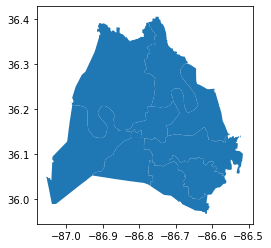

In [7]:
school_districts.plot();

##### Add information and styling

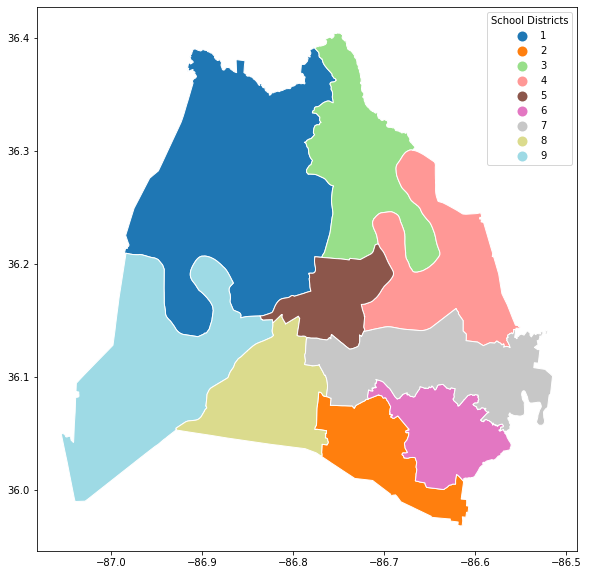

In [8]:
leg_kwds = {'title': 'School Districts', 'loc': 'best', 
           'bbox_to_anchor': (1, 1), 'ncol': 1}

school_districts.plot(column = 'district', figsize=(10,10),
                     edgecolor = 'white', 
                     legend = True, legend_kwds = leg_kwds,
                     cmap = 'tab20')
plt.show()

In [9]:
traffic_accidents = gpd.read_file('../data/Traffic_Accidents.geojson')
print(traffic_accidents.crs)
traffic_accidents

epsg:4326


,city,rpa,zip,state,weather_description,harmfuldescriptions,number_of_injuries,collision_type,date_and_time,harmfulcodes,...,illuaccidemination,accident_number,collision_type_description,illumination_description,street_address,number_of_fatalities,weather,property_damage,lat,geometry
0,MADISON,17040,37115,TN,CLEAR,MOTOR VEHICLE IN TRANSPORT,0.0000,5,2014-07-06T12:45:00,12,...,1,20400639785,SIDESWIPE - SAME DIRECTION,DAYLIGHT,MM 93 0 I65 N,0.0000,21,None,0.0000,POINT (0.00000 0.00000)
1,NASHVILLE,8206,37210,TN,CLEAR,MOTOR VEHICLE IN TRANSPORT,1,11,2021-07-04T22:25:00,12,...,3,20210363004,Front to Rear,DARK - LIGHTED,MM 212 3 I 40,0,21,None,36.1447,POINT (-86.73990 36.14470)
2,NASHVILLE,6117,37215,TN,CLEAR,MOTOR VEHICLE IN TRANSPORT,0,11,2021-07-04T21:40:00,12,...,3,20210362961,Front to Rear,DARK - LIGHTED,HOBBS RD & ESTES RD,0,21,None,36.103,POINT (-86.83830 36.10300)
3,HERMITAGE,9557,37076,TN,CLEAR,UNKNOWN MOST HARMFUL EVENT,1,9,2021-07-04T19:41:00,99,...,1,20210362814,UNKNOWN,DAYLIGHT,OLD HICKORY BLVD & BURNING TREE DR,0,21,None,36.1742,POINT (-86.60190 36.17420)
4,NASHVILLE,4521,37209,TN,CLEAR,None,1,0,2021-07-04T18:40:00,9,...,1,20210362748,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DAYLIGHT,JEFFERSON ST & ED TEMPLE BLVD,0,21,None,36.1678,POINT (-86.82080 36.16780)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228104,NASHVILLE,9999,37217,TN,NO ADVERSE CONDITIONS,MOTOR VEHICLE IN TRANSPORT,0.0000,4,2014-04-09T07:30:00,12,...,1,2003336659,ANGLE,DAYLIGHT,GLENPARK DR & WINTHORNE DR,0.0000,1,true,36.1168,POINT (-86.70050 36.11680)
228105,NASHVILLE,1939,37206,TN,RAIN,MOTOR VEHICLE IN TRANSPORT,0.0000,2,2014-04-02T22:35:00,12,...,3,2003125236,HEAD-ON,DARK - LIGHTED,MAIN ST & MCFERRIN AVE,0.0000,2,false,36.1765,POINT (-86.75570 36.17650)
228106,NASHVILLE,8533,37204,TN,NO ADVERSE CONDITIONS,OTHER NON-COLLISION;FENCE,1.0000,0,2014-02-11T17:45:00,07;38,...,2,2002112014,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DARK - NOT LIGHTED,3661 TROUSDALE DR,0.0000,1,false,36.0931,POINT (-86.74990 36.09310)
228107,ANTIOCH,8867,37013,TN,NO ADVERSE CONDITIONS,MOTOR VEHICLE IN TRANSPORT,0.0000,1,2014-03-09T16:37:00,12,...,5,2002012501,REAR END,DUSK,FIRESTONE PKWY & OLD HICKORY BLVD,0.0000,1,false,36.0169,POINT (-86.61990 36.01690)


In [10]:
traffic_accidents['harmfuldescriptions'] == 'PEDESTRIAN'

0         False
1         False
2         False
3         False
4         False
          ...  
228104    False
228105    False
228106    False
228107    False
228108    False
Name: harmfuldescriptions, Length: 228109, dtype: bool

In [11]:
traffic_accidents['date_and_time'].str.contains('2021')


0         False
1          True
2          True
3          True
4          True
          ...  
228104    False
228105    False
228106    False
228107    False
228108    False
Name: date_and_time, Length: 228109, dtype: bool

### Trim down Traffic Accidents to only Pedestrian related and the year 2021
#### Also, create a 'lng' column from the geometry column

In [12]:
#tr_acc_last_day = traffic_accidents.loc[traffic_accidents['date_and_time'].str.contains('2021-05-25')]
#tr_acc_last_day

ped_acc_2021 = traffic_accidents.loc[(traffic_accidents['harmfuldescriptions'] == 'PEDESTRIAN') &
                                     (traffic_accidents['date_and_time'].str.contains('2021'))]
ped_acc_2021['lng'] = ped_acc_2021['geometry'].x

ped_acc_2021

,city,rpa,zip,state,weather_description,harmfuldescriptions,number_of_injuries,collision_type,date_and_time,harmfulcodes,...,accident_number,collision_type_description,illumination_description,street_address,number_of_fatalities,weather,property_damage,lat,geometry,lng
18,OLD HICKORY,9607,37138,TN,CLEAR,PEDESTRIAN,1,0,2021-07-04T11:46:00,8,...,20210362325,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DAYLIGHT,OLD HICKORY BLVD & FELLOWSHIP LN,0,21,None,36.238,POINT (-86.62910 36.23800),-86.6291
22,NASHVILLE,4039,37203,TN,CLEAR,PEDESTRIAN,1,0,2021-07-04T10:49:00,8,...,20210362287,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DAYLIGHT,5TH AVS & PEABODY ST,0,21,None,36.1556,POINT (-86.77520 36.15560),-86.7752
74,NASHVILLE,4013,37203,TN,CLEAR,PEDESTRIAN,2,0,2021-07-02T00:00:00,8,...,20210360107,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DARK - LIGHTED,DIVISION ST & 12TH AVS,0,21,None,36.1511,POINT (-86.78450 36.15110),-86.7845
134,NASHVILLE,5509,37203,TN,CLEAR,PEDESTRIAN,1,0,2021-07-01T18:30:00,8,...,20210358015,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DAYLIGHT,20TH AVN & PATTERSON ST,0,21,None,36.1553,POINT (-86.80220 36.15530),-86.8022
192,NASHVILLE,8937,37217,TN,None,PEDESTRIAN,2,0,2021-06-30T22:40:00,8,...,20210356254,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DARK - LIGHTED,MURFREESBORO PKE & SCOTT VALLEY DR,0,None,None,36.0803,POINT (-86.64540 36.08030),-86.6454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,ANTIOCH,8979,37013,TN,None,PEDESTRIAN,1,0,2021-01-07T15:44:00,8,...,20210012589,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DAYLIGHT,BELL RD & MURFREESBORO PKE,0,None,None,36.0729,POINT (-86.63570 36.07290),-86.6357
9020,NASHVILLE,8501,37211,TN,None,PEDESTRIAN,1,0,2021-01-06T00:00:00,8,...,20210010462,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DARK - LIGHTED,WELSHWOOD DR & NOLENSVILLE PKE,0,None,None,36.0825,POINT (-86.72790 36.08250),-86.7279
9090,NASHVILLE,8511,37211,TN,CLEAR,PEDESTRIAN,1,0,2021-01-04T19:25:00,8,...,20210006389,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DARK - NOT LIGHTED,NOLENSVILLE PKE & NATCHEZ CT,0,21,None,36.0944,POINT (-86.73670 36.09440),-86.7367
9095,NASHVILLE,1919,37207,TN,CLEAR,PEDESTRIAN,1,0,2021-01-04T17:55:00,8,...,20210006288,NOT COLLISION W/MOTOR VEHICLE-TRANSPORT,DARK - LIGHTED,DICKERSON PKE & CLEVELAND ST,0,21,None,36.1875,POINT (-86.77340 36.18750),-86.7734


In [13]:
type(ped_acc_2021)

geopandas.geodataframe.GeoDataFrame

In [14]:
ped_acc_2021 = ped_acc_2021[['zip', 'harmfuldescriptions', 'number_of_injuries', 'date_and_time', 'street_address', 'lat', 'lng', 'geometry']]

In [15]:
school_districts = school_districts[['zip', 'city', 'district', 'geometry' ]]

In [16]:
ped_acc_by_district = gpd.sjoin(ped_acc_2021, school_districts, op= 'within')
ped_acc_by_district.head()

,zip_left,harmfuldescriptions,number_of_injuries,date_and_time,street_address,lat,lng,geometry,index_right,zip_right,city,district
18,37138,PEDESTRIAN,1,2021-07-04T11:46:00,OLD HICKORY BLVD & FELLOWSHIP LN,36.238,-86.6291,POINT (-86.62910 36.23800),3,37076,Hermitage,4
1519,37210,PEDESTRIAN,1,2021-06-04T11:03:00,2011 ELM HILL PKE,36.1502,-86.6999,POINT (-86.69990 36.15020),3,37076,Hermitage,4
1569,37210,PEDESTRIAN,1,2021-06-03T14:05:00,LEBANON PKE & SPENCE LN,36.1537,-86.7214,POINT (-86.72140 36.15370),3,37076,Hermitage,4
2921,37214,PEDESTRIAN,1,2021-05-07T20:15:00,JACKSON DOWNS BLVD & LEBANON PKE,36.1853,-86.6365,POINT (-86.63650 36.18530),3,37076,Hermitage,4
4599,37214,PEDESTRIAN,1,2021-04-04T04:25:00,ATRIUM WAY & BRILEY PKWYN,36.1577,-86.6918,POINT (-86.69180 36.15770),3,37076,Hermitage,4


In [17]:
ped_acc_by_district['district'].value_counts()

5    33
3    14
7    12
1    11
4    10
8     8
6     6
9     6
2     6
Name: district, dtype: int64

In [18]:
acc_in_d5 = ped_acc_by_district.loc[ped_acc_by_district['district'] == '5']
acc_in_d5.shape

(33, 12)

In [19]:
polygon_d5 = school_districts.loc[school_districts['district'] == '5']
polygon_d5.shape

(1, 4)

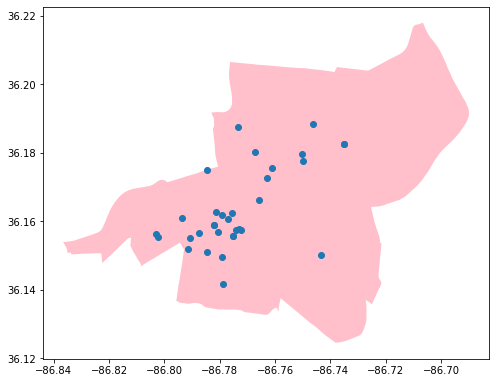

In [20]:
#fig, ax = matplotlib.subplots()
ax = polygon_d5.plot(figsize = (8,10), color = 'pink')
acc_in_d5.plot(ax = ax);
plt.show();

In [21]:
center = polygon_d5.geometry.centroid[6]
print(center)

POINT (-86.75214735715096 36.16995457037151)


In [22]:
#reveresed order (long, lat)
area_center = [center.y,center.x]
print(area_center)

[36.16995457037151, -86.75214735715096]


In [23]:
#create map of school_district 5 and the pedestrian traffic incidents in 2021
map_d5 = folium.Map(location = area_center, zoom_start = 12)
map_d5

#### add outline of district 5

In [24]:
i=0
for row_index, row_values in acc_in_d5.iterrows():
    if i <3:
        print('index is', row_index)
        print('values are:')
        print('')
        print(row_values)
        print('-------------------------')
        i+=1

index is 22
values are:

zip_left                                  37203
harmfuldescriptions                  PEDESTRIAN
number_of_injuries                            1
date_and_time               2021-07-04T10:49:00
street_address             5TH AVS & PEABODY ST
lat                                     36.1556
lng                                    -86.7752
geometry               POINT (-86.7752 36.1556)
index_right                                   6
zip_right                                 37203
city                                  Nashville
district                                      5
Name: 22, dtype: object
-------------------------
index is 74
values are:

zip_left                                            37203
harmfuldescriptions                            PEDESTRIAN
number_of_injuries                                      2
date_and_time                         2021-07-02T00:00:00
street_address                     DIVISION ST & 12TH AVS
lat                               

### Map with additional features


In [25]:
map_d5 = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(polygon_d5).add_to(map_d5)

#iterate through stops in d5 to creat marker for each accident
for row_index, row_values in acc_in_d5.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['street_address'])
    icon = folium.Icon(color = 'orange', icon='warning', prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    
    marker.add_to(map_d5)
map_d5.save('../maps/map_d5.html')

map_d5

#### Can we make this work with the full data set?


### MAP WITH ALL DISTRICTS AND ALL PEDESTRIAN ACCIDENTS IN 2021

In [26]:
map_all_d = folium.Map(location = area_center, zoom_start = 10)

#Add all district polygons to the folium map
folium.GeoJson(school_districts).add_to(map_all_d)

#Iterate through each district to create marker for each district
for ind, values in school_districts.iterrows():
    center = school_districts.geometry.centroid[ind]
    point_center = [center.y,center.x]
    p = str('school district: ' + school_districts.district[ind])
    icon = folium.DivIcon(html=f"""<div style="font-family: arial; font-style: bold; 
                                    font-size: 22px; color: #0052ffff; align: center">
                                    {str(values['district'])}</div>""")
    
    marker2 = folium.Marker(
        location = point_center,
        popup = p,
        icon=icon)
        #folium.Icon(color = 'blue', icon='square-o', prefix='fa'))
    marker2.add_to(map_all_d)
    
#iterate through all accidents to create marker for each accident
for row_index, row_values in ped_acc_by_district.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['street_address'])
    icon = folium.Icon(color = 'orange', icon='warning', prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    
    marker.add_to(map_all_d)
map_all_d.save('../maps/map_all_districts.html')

map_all_d

### Create cluster map

In [27]:
map_all_cluster = folium.Map(location = area_center, zoom_start = 10)

marker_cluster = MarkerCluster().add_to(map_all_cluster)

folium.GeoJson(school_districts).add_to(map_all_cluster)
#Iterate through each district to create marker for each district
for ind, values in school_districts.iterrows():
    center = school_districts.geometry.centroid[ind]
    point_center = [center.y,center.x]
    p = str('school district: ' + school_districts.district[ind])
    icon = folium.DivIcon(html=f"""<div style="font-family: arial; font-style: bold;
                                    font-size: 22px; color: #0052ffff; align: center">
                                    {str(values['district'])}</div>""")
    
    marker2 = folium.Marker(
        location = point_center,
        popup = p,
        icon=icon)
        #folium.Icon(color = 'blue', icon='square-o', prefix='fa'))
    marker2.add_to(map_all_cluster)
    
#iterate through all accidents to create marker for each accident
for row_index, row_values in ped_acc_by_district.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['street_address'])
    icon = folium.Icon(color = 'orange', icon='warning', prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop, icon = icon)
    
    marker.add_to(marker_cluster)
map_all_cluster.save('../maps/map_all_cluster.html')

map_all_cluster